## Training YOLO v3 To Detect Maasai Villages

#### Note:  This Jupyter notebook is exported from Google Colabs Pro, adapted from a tutorial by Joseph Nelson

Importing OS and pytorch

In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


Cloning yolo directories into local runtime

In [ ]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.88 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (5824/5824), done.


Importing images and labels from Roboflow export.  

In [1]:
# LINK/API KEY REMOVED FOR SECURITY REASONS

Ultalytics's implemention of YOLOv3 calls for [a specific file management](https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data) where our images are in a folder called `images` and corresponding labels in a folder called `labels`. The image and label names must match identically. Fortunately, our files are named appropriately from Roboflow.

Reorganizing file structure to be compatible with YOLO, then Ultralytics

In [ ]:
%cd train

/content/yolov3/valid/images/train


In [ ]:
%ls

 _darknet.labels
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.311ce1645f3e5fca3a7f99e048197d61.jpg'
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.311ce1645f3e5fca3a7f99e048197d61.txt'
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.4de693cf3282ccced0dd61310e6937e3.jpg'
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.4de693cf3282ccced0dd61310e6937e3.txt'
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.d420f69edb2fdd29591dae938b173cf7.jpg'
'Screen Shot 2020-05-13 at 8_02_34 PM_png.rf.d420f69edb2fdd29591dae938b173cf7.txt'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.497647df2d4cd4f6f4a0f0ac1f70323e.jpg'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.497647df2d4cd4f6f4a0f0ac1f70323e.txt'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.7d69768e5934b5b45fc04dc5c6f7e40b.jpg'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.7d69768e5934b5b45fc04dc5c6f7e40b.txt'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.da2887c84bbd05f266cf83e28555864f.jpg'
'Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.da2887c84bbd05f266cf83e28

In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/yolov3/valid/images/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train_images_roboflow.txt

../train/images/Screen Shot 2020-05-13 at 8_08_49 PM_png.rf.c7055ae1407344f581f67c6e0089f2e7.jpg
../train/images/Screen Shot 2020-05-13 at 8_09_06 PM_png.rf.eee64bb9d7dd2e4110009333438a6ee3.jpg
../train/images/Screen Shot 2020-05-13 at 8_11_12 PM_png.rf.b7a324ff6c324b202c31b1599409664a.jpg
../train/images/Screen Shot 2020-05-13 at 8_04_14 PM_png.rf.bf342dd6962a2ca43f438ed31656bc3a.jpg
../train/images/Screen Shot 2020-05-13 at 8_03_23 PM_png.rf.2abf647f6ba84ae22e692caff679f62d.jpg
../train/images/Screen Shot 2020-05-13 at 8_03_04 PM_png.rf.497647df2d4cd4f6f4a0f0ac1f70323e.jpg
../train/images/Screen Shot 2020-05-13 at 8_03_15 PM_png.rf.30efa03542bec21fea75579f40eff1eb.jpg
../train/images/Screen Shot 2020-05-13 at 8_08_49 PM_png.rf.343e1d0608cf2f94312ef75739a9c126.jpg
../train/images/Screen Shot 2020-05-13 at 8_09_06 PM_png.rf.49f931aa4f502939eeeeda774989da86.jpg
../train/images/Screen Shot 2020-05-13 at 8_03_15 PM_png.rf.5f699ae9acf606988d764a3867a75efe.jpg
../train/images/Screen Shot 20

In [ ]:
%cd ../../valid

/content/yolov3/valid/images/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/yolov3/valid/images/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

../valid/images/Screen Shot 2020-05-13 at 8_03_32 PM_png.rf.94170738b5f59345501505fc77e898ec.jpg
../valid/images/Screen Shot 2020-05-13 at 8_02_26 PM_png.rf.9963302139cbf966a8ba344ec37d4694.jpg


Editing the `roboflow.data` file, which tells our model where to find our data, our numbers of classes, and our class label names.
Checking Paths
Updating Class Names

In [ ]:
%cd ../../yolov3/data

/content/yolov3/valid/images/yolov3/data


In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

burned


In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=2
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


### Training the model using colabs GPU
### This model has been continuously trained using multiple datasets.  The weights file `last.pt` must be manually uploaded to the yolo/weights folder at this point.    

In [ ]:
%cd ../

/content/yolov3/valid/images/yolov3


In [69]:
!python3 train.py --data data/roboflow.data --epochs 300

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', device='', epochs=300, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-15 01:09:42.730448: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1915      0 --:--:-- --:--:-- --:--:--  1906
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0    

Visualizing our results

#### This current iteration is training on burned villages which are visually very unique and subsequently test very well.

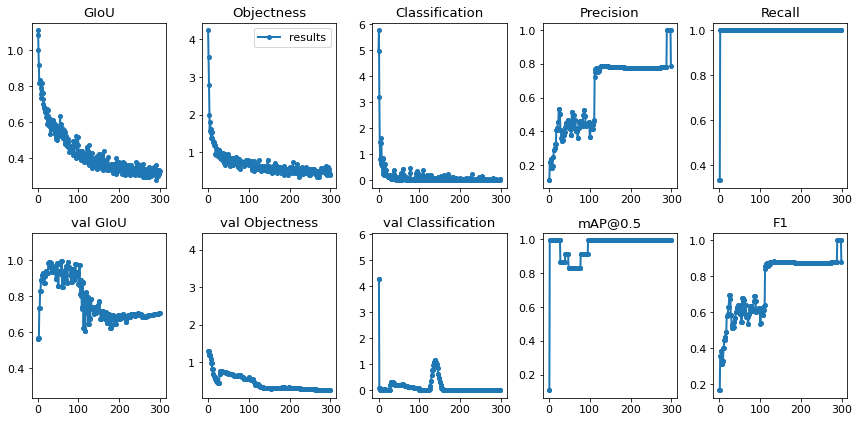

In [70]:
from utils import utils; utils.plot_results()

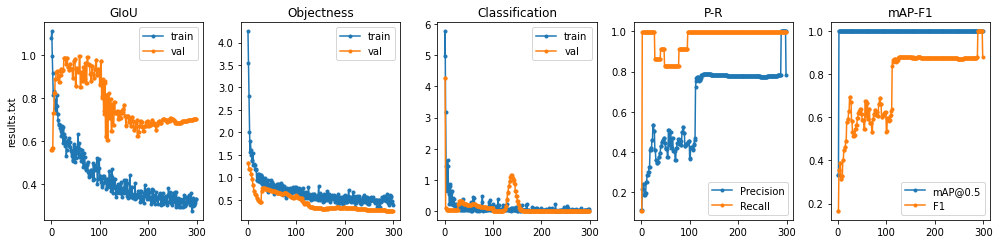

In [79]:
utils.plot_results_overlay()


Checking names and weights

In [71]:
!python3 detect.py --weights weights/last.pt --source=../test --names=../train/roboflow_data.names

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='../train/roboflow_data.names', output='output', save_txt=False, source='../test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/8 ../test/Screen Shot 2020-05-13 at 8_02_13 PM_png.rf.fd5b70294d6a6528b5ef9d3c93873575.jpg: 416x416 5 burneds, Done. (0.037s)
image 2/8 ../test/Screen Shot 2020-05-13 at 8_02_41 PM_png.rf.4e8ab334c1c7d8beb47b490a38ceff3d.jpg: 416x416 2 burneds, 1 villages, Done. (0.019s)
image 3/8 ../test/Screen Shot 2020-05-13 at 8_03_39 PM_png.rf.9c43fa7bc33f0e06991e40d3ac109935.jpg: 416x416 3 burneds, Done. (0.018s)
image 4/8 ../test/Screen Shot 2020-05-13 at 8_03_45 PM_png.rf.65b42f163b35ba7bfd66f415d7121d1e.jpg: 416x416 2 burneds, Done. (0.018s)
i

Ultralytics generates predictions which include the labels and bounding boxes "printed" directly on top of our images. They're saved in our `output` directory within the YOLOv3 repo we cloned above.

In [ ]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

Displaying one image

Screen Shot 2020-05-13 at 8_08_41 PM_png.rf.27b846057cfc1a032278dd6fe1fbb0cf.jpg


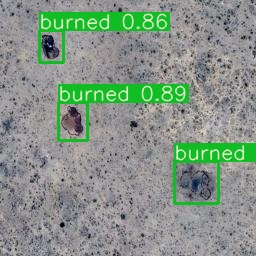

In [73]:
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)

Putting all images together

In [ ]:
images = [ PIL.Image.open(f) for f in glob('./output/*') ]

In [ ]:
# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

In [76]:
# create array of numPy images
np_images = [ img2array(im) for im in images ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


Outputting all images

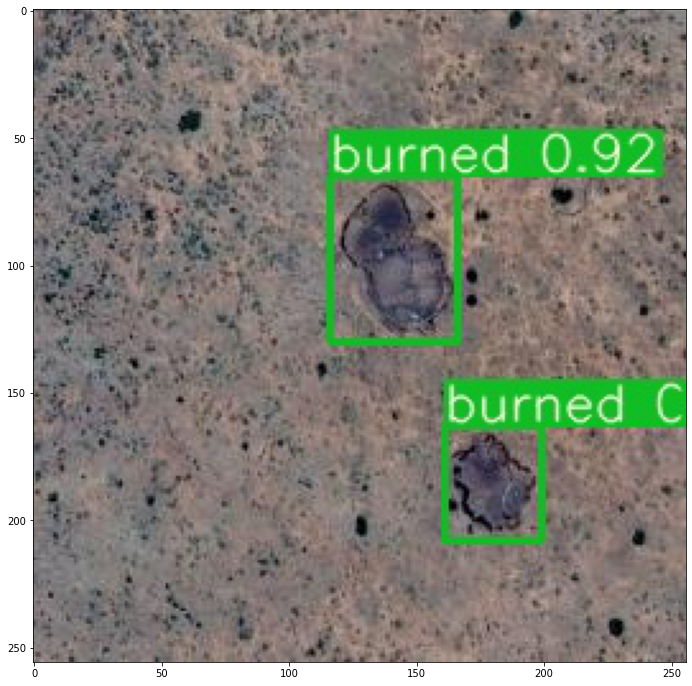

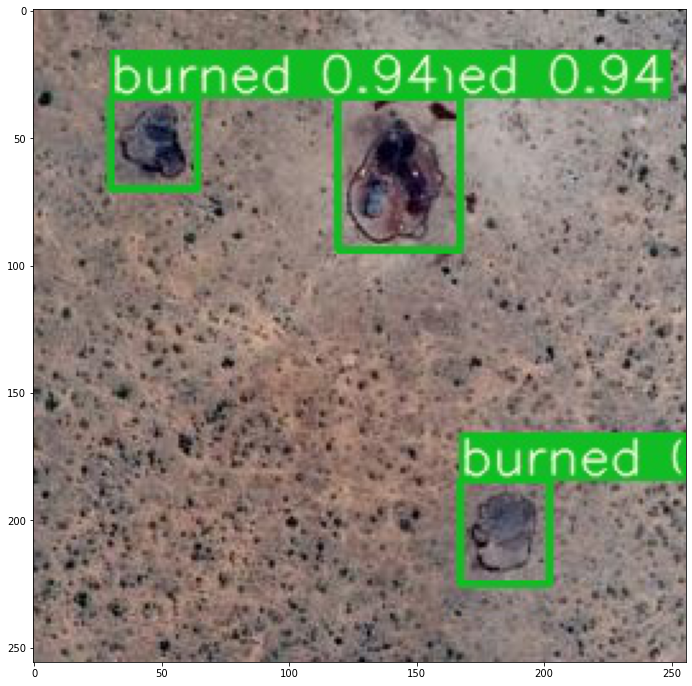

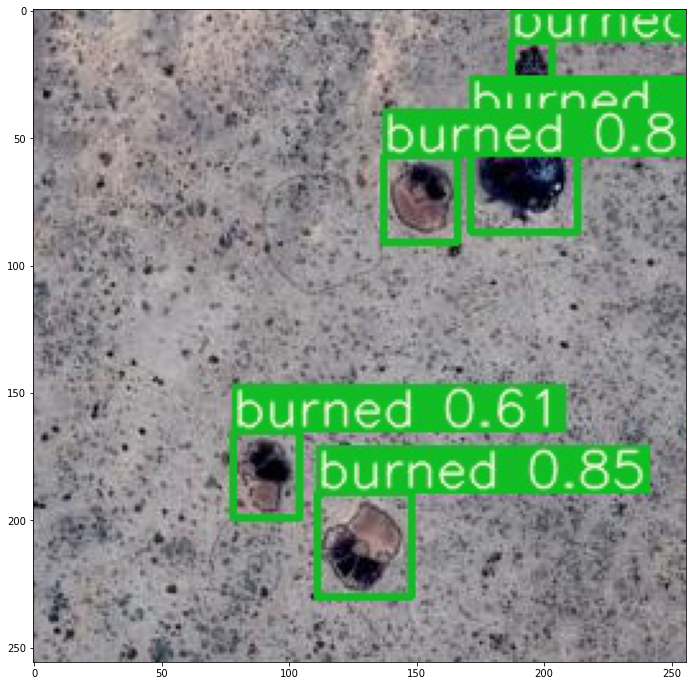

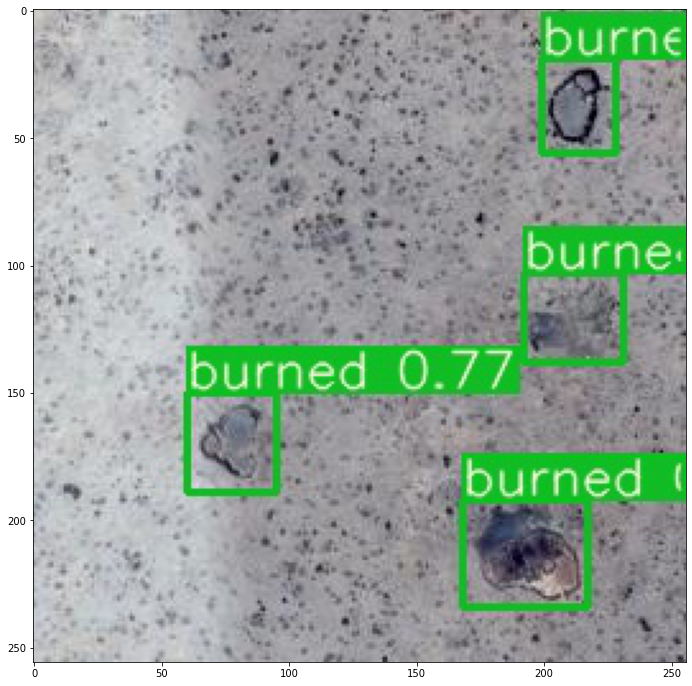

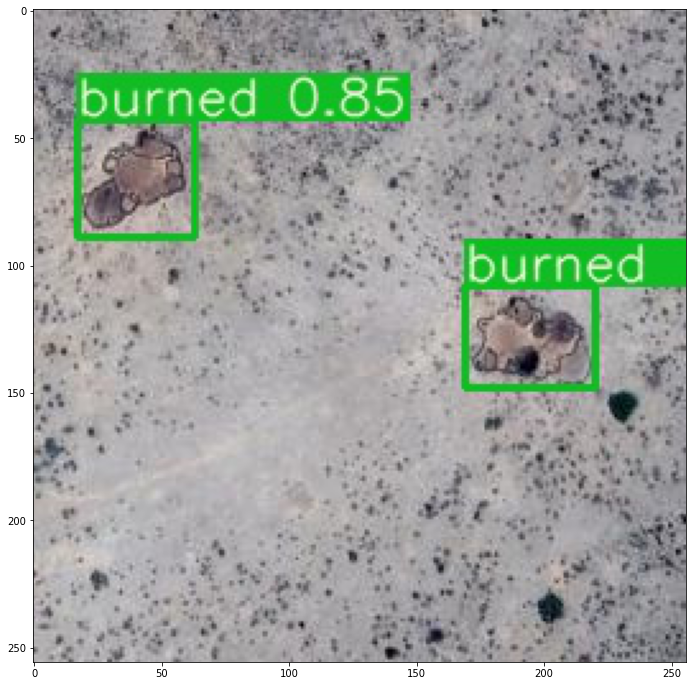

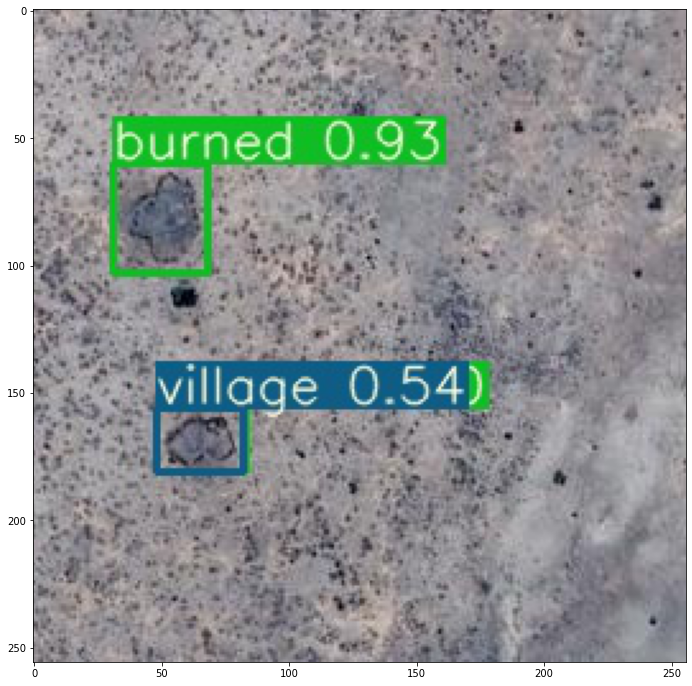

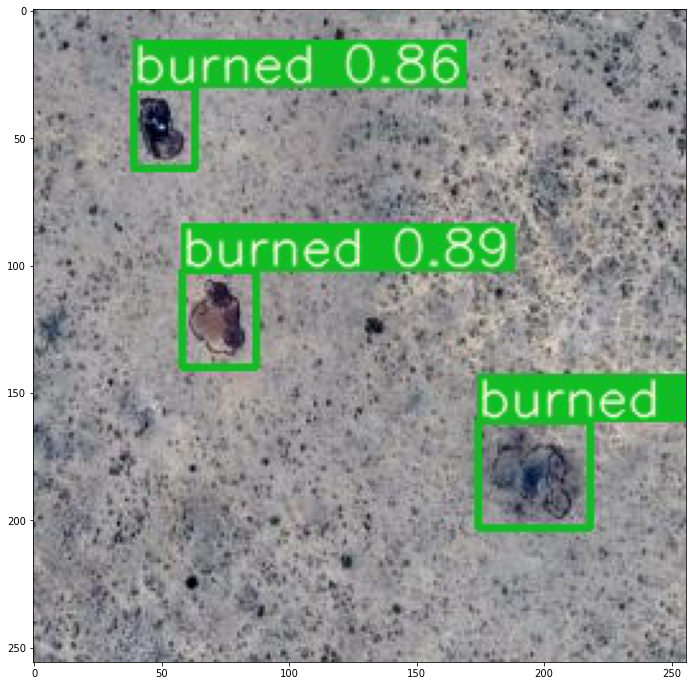

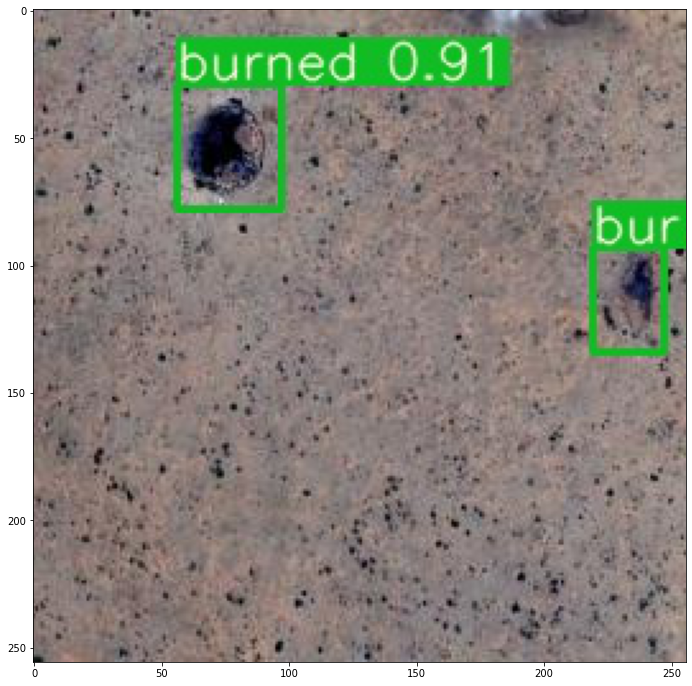

In [77]:
for img in np_images:
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

Saving weights for later


In [2]:
# save locally
from google.colab import files
#files.download('./weights/last.pt')  This seems buggy, so I always just manually download the file.  

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%pwd

'/content/yolov3'

Making a copy of the weights and moving that copy to my personal google drive

In [ ]:
%cp ./weights/last.pt ./weights/last_copy.pt
%mv ./weights/last_copy.pt /content/gdrive/My\ Drive